In [62]:
## Import Libary

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib notebook
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import missingno as msno
import glob

In [50]:
# # Loop to convert .xls to .csv
outPath = r'C:\Users\MLee27\Desktop\Training\06-Jupyter_Practice\10_UMS\WQD7001_Principal_Data_Science\Project_Data\data_local'
def read_file (inPath):
    for dirname, _, filenames in os.walk(inPath):
        for filename in filenames:
            read_file = pd.read_excel(os.path.join(dirname, filename))
            read_file.to_csv ("{}.csv".format(os.path.join(outPath, filename.split('.')[0])),
                             index=None, 
                             header = True)
            
read_file (r'C:\Users\MLee27\Desktop\Training\06-Jupyter_Practice\10_UMS\WQD7001_Principal_Data_Science\Project_Data\data_local _Excel')

In [73]:
# # Load to read csv files in loop and store in different dataframe

d = {}  # dictionary that will hold them 

for dirname, _, filenames in os.walk(outPath): # loop over files
     for filename in filenames:
# read csv into a dataframe and add it to dict with file_name as it key
        d[filename.split('.')[0]] = pd.read_csv(os.path.join(dirname, filename))

In [74]:
print(filenames)

['16q2table1.csv', '16q2table2.csv', '2012_awts_detailopexpenses_table5.csv', '2014_awts_opex_table5.csv', 'arr.csv', 'bes.csv', 'exp.csv', 'gm.csv', 'gmper.csv', 'invent.csv', 'purcha.csv', 'sales.csv', 'taxes.csv', 'tsadjustedsales.csv', 'tsnotadjustedsales.csv', 'US Superstore data.csv']


In [89]:
d['US Superstore data'].head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [91]:
d['US Superstore data']['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [90]:
def eda(data):
    print("----------Top-5- Record----------")
    print(data.head(5))
    print("-----------Information-----------")
    print(data.info())
    print("-----------Data Types-----------")
    print(data.dtypes)
    print("----------Missing value-----------")
    print(data.isnull().sum())
    print("----------Null value-----------")
    print(data.isna().sum())
    print("----------Shape of Data----------")
    print(data.shape)

def graph_insight(data):
    print(set(data.dtypes.tolist()))
    df_num = data.select_dtypes(include = ['float64', 'int64'])
    df_num.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8);
    
def drop_duplicate(data, subset):
    print('Before drop shape:', data.shape)
    before = data.shape[0]
    data.drop_duplicates(subset,keep='first', inplace=True) #subset is list where you have to put all column for duplicate check
    data.reset_index(drop=True, inplace=True)
    print('After drop shape:', data.shape)
    after = data.shape[0]
    print('Total Duplicate:', before-after)

----------Top-5- Record----------
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688  2016-06-12  2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Su

<IPython.core.display.Javascript object>


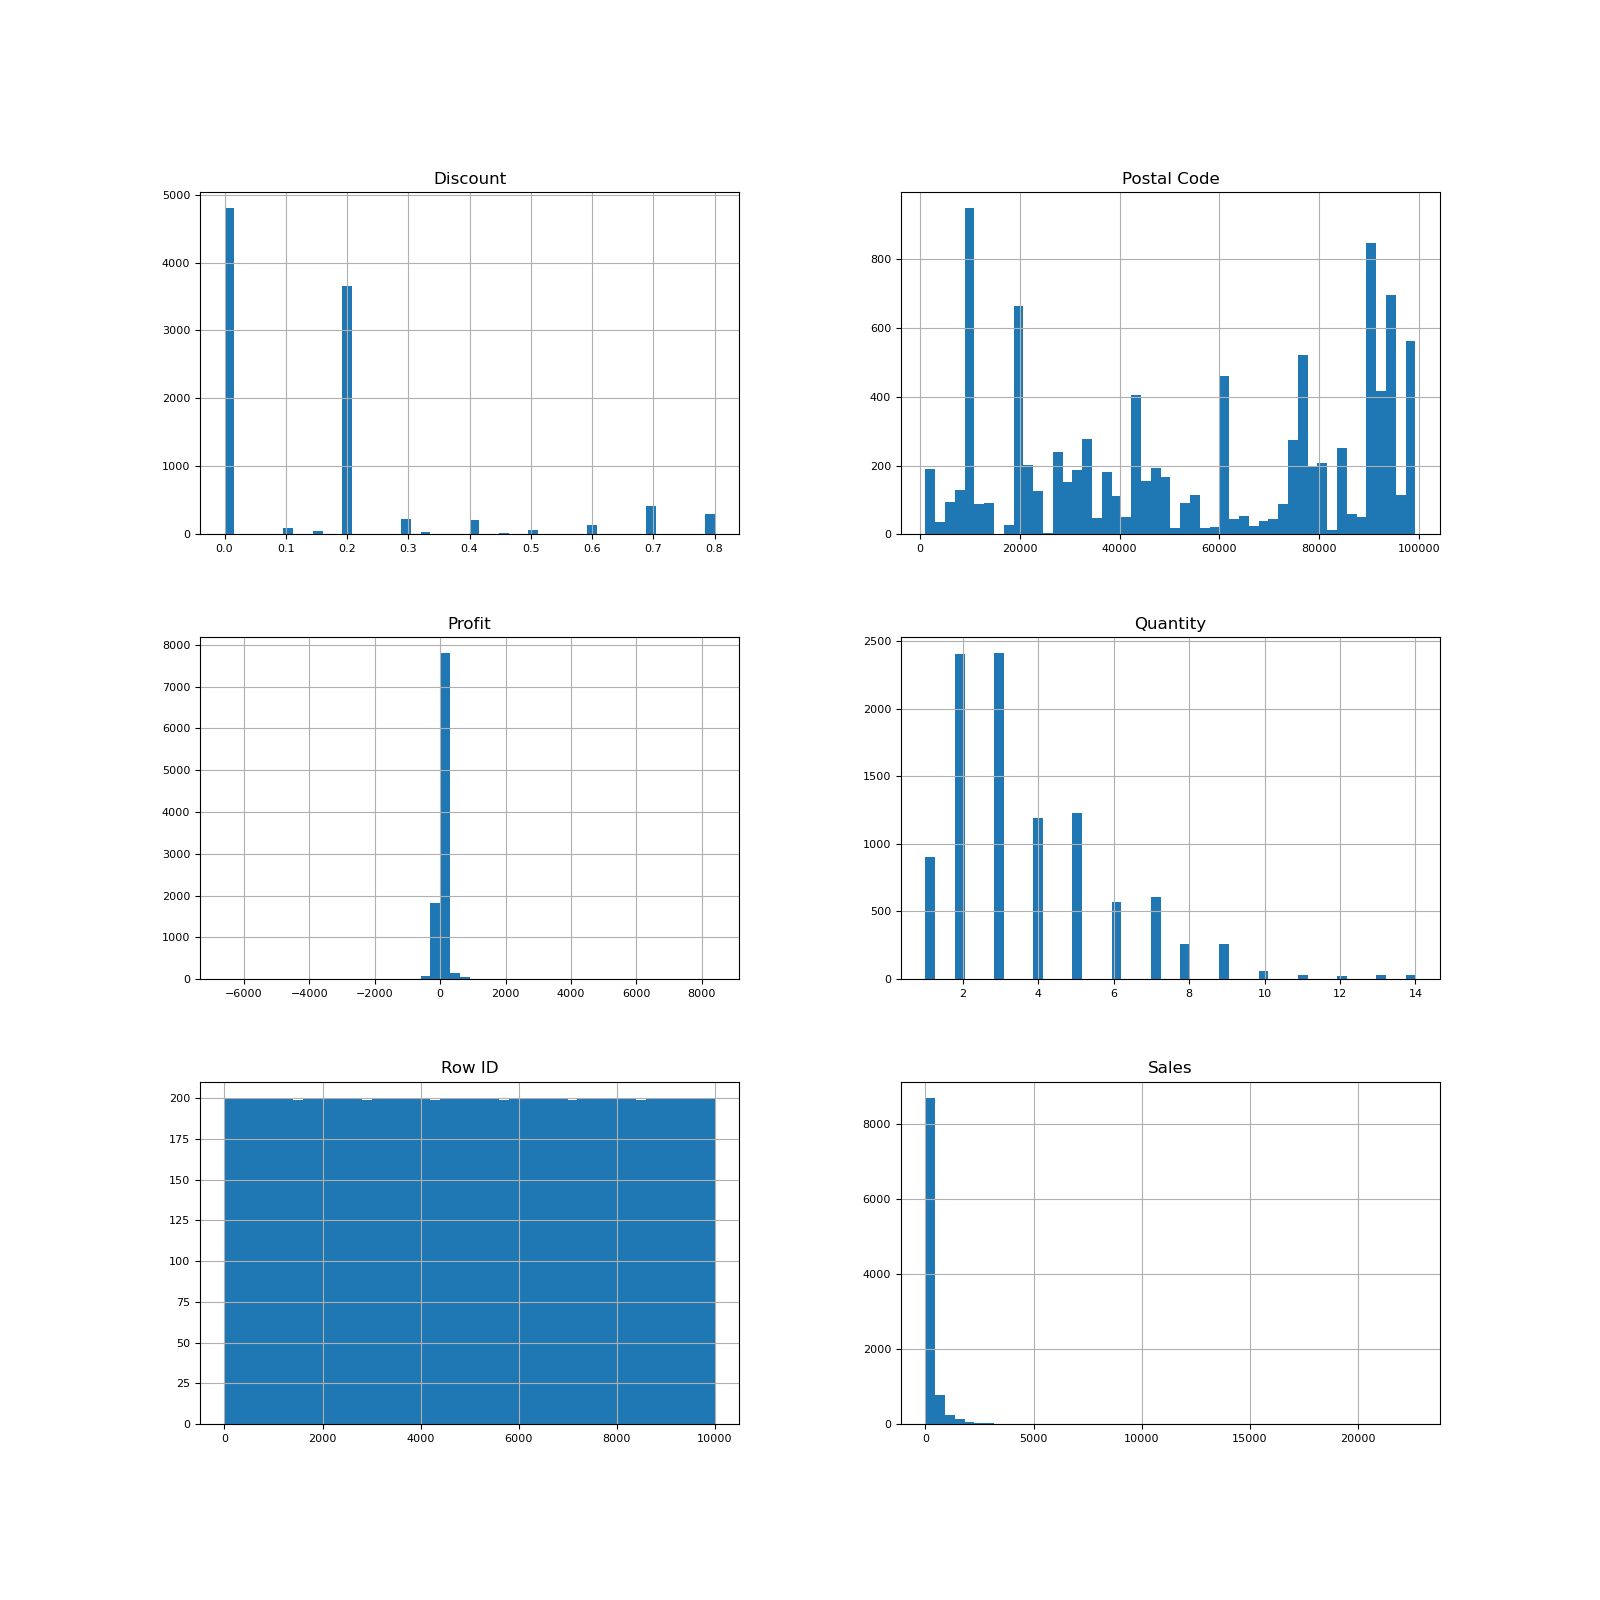

In [92]:
eda(d['US Superstore data'])
graph_insight(d['US Superstore data'])

In [93]:
d['16q2table1'].tail(10)

,Quarter Adjusted2,Retail Sales (millions of dollars) Total,E-commerce,E-commerce as a Percent of Total,Percent Change From Prior Quarter (Total),Percent Change From Prior Quarter (E-commerce),Percent Change From Same Quarter A Year Ago (Total),Percent Change From Same Quarter A Year Ago (E-commerce)
1,1st quarter 2016(r),1183779.0,93046.0,7.9,-0.3,4.0,2.2,15.5
2,4th quarter 2015,1186748.0,89454.0,7.5,0.1,2.1,1.4,15.1
3,3rd quarter 2015,1185288.0,87588.0,7.4,0.9,4.3,1.6,15.2
4,2nd quarter 2015(r),1174911.0,83987.0,7.1,1.4,4.2,1.2,14.2
5,Not Adjusted,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2nd quarter 2016(p),1215205.0,91242.0,7.5,8.8,5.7,2.1,15.8
7,1st quarter 2016(r),1116632.0,86351.0,7.7,-10.6,-20.2,3.3,15.2
8,4th quarter 2015,1249081.0,108175.0,8.7,5.1,33.5,1.7,14.8
9,3rd quarter 2015,1188363.0,81020.0,6.8,-0.1,2.8,1.6,15.4
10,2nd quarter 2015,1189836.0,78784.0,6.6,10.1,5.1,1.1,14.7


In [77]:
d['2012_awts_detailopexpenses_table5'].head(10)

,NAICS code,Kind of Business (sub-parts indicated by one or more leading spaces),"Operating expenses, total",Annual payroll,Unnamed: 4,Total employer costs for fringe benefits3,Unnamed: 6,Detailed employer costs for fringe benefits3,Unnamed: 8,Unnamed: 9,...,Purchased advertising and promotional services,Unnamed: 44,Purchased professional and technical services,Unnamed: 46,Depreciation and amortization charges,Unnamed: 48,Taxes and license fees,Unnamed: 50,Other operating expenses 2,Unnamed: 52
0,NaN,NaN,NaN,Amount,Percent of total,Amount,Percent of total,Health Insurance,Defined contribution plans,Defined benefit pension plans,...,Amount,Percent of total,Amount,Percent of total,Amount,Percent of total,Amount,Percent of total,Amount,Percent of total
1,42.0,"U.S. Merchant Wholesalers, except Manufacturer...",632220.0,271436,42.9,61182,9.7,24889,7778,2771,...,25009,4,18353,2.9,27390,4.3,7189,1.1,S,S
2,423.0,Durable Goods,388403.0,171141,44.1,38777,10,15974,4765,1616,...,16891,4.3,11609,3,15962,4.1,4305,1.1,S,S
3,4231.0,Motor Vehicle and Motor Vehicle Parts and Sup...,51368.0,18157,35.3,4128,8,1635,416,176,...,6337,12.3,1608,3.1,2243,4.4,588,1.1,S,S
4,4232.0,Furniture and Home Furnishings,15560.0,6589,42.3,1283,8.2,502,123,26,...,446,2.9,369,2.4,351,2.3,133,0.9,S,S
5,4233.0,Lumber & Other Construction Materials,17381.0,7980,45.9,1736,10,690,193,35,...,232,1.3,375,2.2,837,4.8,231,1.3,S,S
6,4234.0,Professional and Comercial Equipment and Supplies,75334.0,36088,47.9,7425,9.9,2848,756,541,...,2840,3.8,3003,4,2933,3.9,569,0.8,S,S
7,42343.0,Computer and Computer Peripheral Equipment and...,28312.0,14331,50.6,S,S,975,271,S,...,1130,4,1413,5,S,S,S,S,S,S
8,4235.0,"Metals and Minerals, ex. Petroleum",17691.0,7548,42.7,1806,10.2,769,235,91,...,115,0.6,423,2.4,885,5,338,1.9,1553,8.8
9,4236.0,Electrical Goods,68932.0,30671,44.5,7661,11.1,3231,1227,426,...,2725,4,2243,3.3,3002,4.4,689,1,6735,9.8


In [96]:
d['2014_awts_opex_table5'].columns

Index(['2007 NAICS CODE',
       'Data Item                                                        ',
       '\nKind of Business (sub-parts indicated by one or more leading spaces)',
       'Type of Operation                                                        ',
       '2014', '2013r', '2012r', '2011r', '2010r', '2009r', '2008r', '2007',
       '2006', '2005', '2004', '2003', '2002'],
      dtype='object')

In [97]:
d['2014_awts_opex_table5']['\nKind of Business (sub-parts indicated by one or more leading spaces)'].unique()

array([nan, 'Wholesale Trade', 'Durable Goods',
       'Motor Vehicle and Motor Vehicle Parts and Supplies',
       'Furniture and Home Furnishings',
       'Lumber & Other Construction Materials',
       'Professional and Comercial Equipment and Supplies',
       ' Computer and Computer Peripheral Equipment and Software',
       'Metals and Minerals, ex. Petroleum', 'Electrical Goods',
       'Hardware, and Plumbing and Heating Equipment and Supplies',
       'Machinery, Equipment and Supplies', 'Miscellaneous Durable Goods',
       'Nondurable Goods', 'Paper and Paper Products',
       "Drugs and Druggists' Sundries",
       'Apparel, Piece Goods, and Notions',
       'Groceries and Related Products', 'Farm Product Raw Materials',
       'Chemicals and Allied Products',
       'Petroleum and Petroleum Products',
       'Beer, Wine, and Distilled Alcoholic Beverages',
       'Miscellaneous Nondurable Goods',
       'Lumber & Other Constrction Materials'], dtype=object)

In [80]:
d['bes'].head(10)

,NAICS code,Kind of business (sub-parts indicated by one or more leading dots),"Operating expenses, total",Annual payroll,Unnamed: 4,Total employer cost for fringe benefits²,Unnamed: 6,Detailed employer costs for fringe benefits²,Unnamed: 8,Unnamed: 9,...,Purchased advertising and promotional services,Unnamed: 44,Purchased professional and technical services,Unnamed: 46,Depreciation and amortization charges,Unnamed: 48,Taxes and license fees,Unnamed: 50,Other operating expenses4,Unnamed: 52
0,NaN,NaN,NaN,Amount,Percent of total,Amount,Percent of total,Health insurance,Defined contribution plans,Defined benefit pension plans,...,Amount,Percent of total,Amount,Percent of total,Amount,Percent of total,Amount,Percent of total,Amount,Percent of total
1,44-45,"Retail Trade, total5 ………………………………………...…………………...",916307.0,394957,43.1,82714,9,32138,5899,3250,...,53021,5.8,16949,1.8,51193,5.6,17855,1.9,92489,10.1
2,441,Motor vehicle and parts dealers ……………………………………...,130153.0,65382,50.2,11700,9,4312,548,110,...,9266,7.1,2057,1.6,3950,3,2201,1.7,11126,8.5
3,4411,Automobile dealers ………………………………………...……………………...,92263.0,46947,50.9,8107,8.8,3008,362,61,...,7578,8.2,1464,1.6,2442,2.6,1452,1.6,7749,8.4
4,4413,"Auto parts, access., and tire stores ………………………...",27870.0,13857,49.7,2772,9.9,1015,145,48,...,1146,4.1,450,1.6,1198,4.3,595,2.1,2113,7.6
5,442,Furniture and home furnishings stores ……………………...,34721.0,12898,37.1,2481,7.1,917,130,19,...,3194,9.2,451,1.3,1345,3.9,616,1.8,3831,11
6,443,Electronics and appliance stores …………………………………...,26027.0,11044,42.4,1986,7.6,666,123,7,...,1894,7.3,1041,4,1509,5.8,430,1.7,2079,8
7,444,Building mat. and garden equip. and supplies d...,74261.0,35414,47.7,7625,10.3,3572,588,98,...,3331,4.5,810,1.1,4738,6.4,1644,2.2,6463,8.7
8,4441,Building material and supplies dealers……………………...,64850.0,31353,48.3,6864,10.6,3313,541,74,...,2971,4.6,687,1.1,4180,6.4,1464,2.3,5367,8.3
9,445,Food and beverage stores ………………………………………...………...,147801.0,65074,44,17639,11.9,7688,1136,1281,...,4818,3.3,1605,1.1,9320,6.3,2435,1.6,14431,9.8


In [81]:
# # Check the dataframe columns
d['US Superstore data'].columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [94]:
d['sales'].head(10)

,NAICS Code,Kind of business,2014,2013r,2012r,2011r,2010r,2009r,2008r,2007,...,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992
0,NaN,"Retail and food services sales, total ……………………...",5211542,5001242,4826390,4597569,4285782,4064965,4391778,4439733,...,3378906,3287537,3086990,2852956,2726131,2603794,2450628,2330235,2153095,2014102
1,NaN,Total (excl. motor vehicle and parts dealers) ...,4190358,4042054,3939896,3784874,3543235,3393442,3606053,3529594,...,2563327,2491327,2322786,2164541,2072314,1976287,1870913,1789094,1680179,1595709
2,NaN,"Retail sales, total ………………………………………...……………………...",4636345,4459003,4302229,4102187,3818841,3612947,3935505,3995182,...,3062268,2983276,2803090,2581762,2468767,2361549,2217616,2105235,1937628,1811237
3,NaN,"Retail sales, total (excl. motor vehicle and p...",3615161,3499815,3415735,3289492,3076294,2941424,3149780,3085043,...,2246689,2187066,2038886,1893347,1814950,1734042,1637901,1564094,1464712,1392844
4,NaN,GAFO¹ ………………………………………...…………………………………………………………...,1239722,1214329,1191843,1155440,1114295,1088148,1136357,1143426,...,882700,862739,815665,757936,713387,682613,650040,616347,570782,533388
5,441.0,Motor vehicle and parts dealers ……………………………...,1021184,959188,886494,812695,742547,671523,785725,910139,...,815579,796210,764204,688415,653817,627507,579715,541141,472916,418393
6,4411.0,Automobile dealers ………………………………………...……………...,875443,819020,752778,684302,620890,551797,649390,767403,...,707676,687782,661820,593501,564658,543949,501684,468100,407126,358444
7,44111.0,New car dealers ………………………………………...………………………...,785058,735134,672550,608566,549260,486418,575506,687707,...,649413,630123,606167,542559,518972,502340,464642,435661,379522,333801
8,44112.0,Used car dealers ………………………………………...……………………...,90385,83886,80228,75736,71630,65379,73884,79696,...,58263,57659,55653,50942,45686,41609,37042,32439,27604,24643
9,4412.0,Other motor vehicle dealers ………………………………………...,59747,55025,49581,45463,43785,45544,60039,68001,...,46811,44989,39735,34915,30615,27994,26128,23801,20980,18026
